# Machine Learning Advanced Nanodegree

## Capstone Project

<hr>

### <u>Table of contents</u>

* <a href="#Domain-Background">Domain Background</a>
* <a href="#Problem-Statement">Problem Statement</a> 
* <a href="#Data-Overview-and-Cleaning">Data Overview and Cleaning</a>
* <a href="#Exploratory-Analysis">Exploratory Analysis</a>
* <a href="#Feature-Engineering">Feature Engineering</a>
* <a href="#Vectorization">Vectorization</a>
* <a href="#Baseline-Model">Baseline Model</a>
* <a href="#Model-Application">Model Application</a>
* <a href="#Evaluation">Evaluation</a>

### <u>Domain Background</u>

My project draws upon the domain of document classification with an emphasis on the natural language processing component of document classification. Machine learning has been successfully used to classify documents by topic for several decades. However, machine learning techniques do not perform as well when performing sentiment analysis which requires the parsing of more complex language structures. This is where ideas from natural language processing must be applied. My aim with this project is to make progress towards solving a complex natural language processing problem using machine learning. I think that it would be very beneficial if computers could interpret and produce the same kind of natural language of which even young children are capable. This would allow machine learning to be applied to a wider variety of tasks than it is currently capable of solving. In particular, machine learning could be applied to many problems that are not well structured and for which there is not much training data.
This capstone project is based on the Toxic Comment Classification Challenge

Discussing things you care about can be difficult. The threat of abuse and harassment online means that many people stop expressing themselves and give up on seeking different opinions. Platforms struggle to effectively facilitate conversations, leading many communities to limit or completely shut down user comments.

The Conversation AI team, a research initiative founded by Jigsaw and Google (both a part of Alphabet) are working on tools to help improve online conversation. One area of focus is the study of negative online behaviors, like toxic comments (i.e. comments that are rude, disrespectful or otherwise likely to make someone leave a discussion). So far they’ve built a range of publicly available models served through the Perspective API, including toxicity. But the current models still make errors, and they don’t allow users to select which types of toxicity they’re interested in finding (e.g. some platforms may be fine with profanity, but not with other types of toxic content).
With more people joining social media than ever before, it becomes imperative that this problem is solved. Classifying toxic comments (obscene, threat, insult, identity‒based hate) will be the core of this project.

### <u>Problem Statement</u>

In this project, I will build a multi‒headed model that will be capable of detecting different types of toxicity like threats, obscenity, insults, and identity‒based hate from a given comment. I’ll be using a dataset of comments from Wikipedia’s talk page edits. Improvements to the current models will hopefully help online discussion become more productive and respectful.

This is a supervised multi‒class classification problem and as such different measurable evaluation metrics could be applied. Given a comment, the solution will be a machine learning model that receives as input the comment and outputs either a class prediction or a class probabilty for every toxicity type.

### <u>Data Overview and Cleaning</u>

I’ll be using a dataset of comments from Wikipedia’s talk page edits which have been labeled by human raters for toxic behavior.
The types of toxicity are:

* toxic 
* severe toxic
* obscene
* threat
* insult 
* identity̲hate

#### Importing Data

In [1]:
local = 1

import numpy as np
import pandas as pd
from IPython.display import HTML, display
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Styling

plt.style.use('ggplot')
sns.set_style('whitegrid')

if local:
    train = pd.read_csv("./data/train.csv")
    test = pd.read_csv("./data/test.csv")
else :
    train = pd.read_csv("../input/jigsaw-toxic-comment-classification-challenge/train.csv")
    test = pd.read_csv("../input/jigsaw-toxic-comment-classification-challenge/test.csv")


# Lets have a peek at our training data

display(HTML(train.sample(n = 5).to_html()))

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
113676,5fde23254096c895,oppose occupation vs. plant. This is no reason...,0,0,0,0,0,0
79170,d3e6d36417ae2546,It wasn't a bad page... it just needed work to...,0,0,0,0,0,0
74810,c81d1e24e6d4bd10,"""\n\nBut there is no cherry picking. The artic...",0,0,0,0,0,0
123208,93219ac2e5990376,Well I'm not going to get 3RR'd in the face of...,0,0,0,0,0,0
103885,2bcd4571e1941e5e,"Paleography, the study of writing \n\nIs your ...",0,0,0,0,0,0


In [2]:
display(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


None

In [3]:
# Lets have a peek at our test data

display(HTML(test.sample(n = 5).to_html()))

,id,comment_text
87054,913f3ceb35b52a21,SPONGES KISS MY ASS!! THEY ALSO ARE GOOD TO HA...
44181,4941c9ac917702f6,Get off your asses and start writing some stuf...
81253,879e7271355a7f00,""" \n :::: One of the reasons I was initially c..."
110096,b7a74ee3395bf0fb,Anusuyaw3 Pvt Ltd Chennai \n\n One of the best...
62230,6793c5f388bc50cc,:I placed the Mercatornet award back in next t...


In [4]:
display(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
id              153164 non-null object
comment_text    153164 non-null object
dtypes: object(2)
memory usage: 2.3+ MB


None

#### Data Set Overview

Our train and test data consists of 159571 and 153164 observations respectively. Both the train and test data do not have any null values. 😅 

In [5]:
# Lets create a separate dataframe to perform EDA on

def findClean(series):
    s = sum(series)
    if s == 0:
        return 1
    else:
        return 0
    
eda = train.copy()
eda["clean"] = eda.iloc[:,2:].apply(findClean, axis = 1)

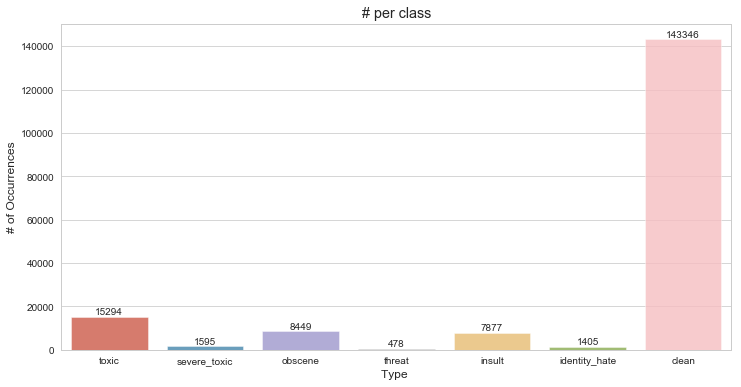

In [6]:
# Lets study class imbalance

x = eda.iloc[:, 2:].sum()
#plot
plt.figure(figsize = (12, 6))
ax = sns.barplot(x.index, x.values, alpha = 0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize = 12)
plt.xlabel('Type ', fontsize = 12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = 'center', va = 'bottom')

plt.show()

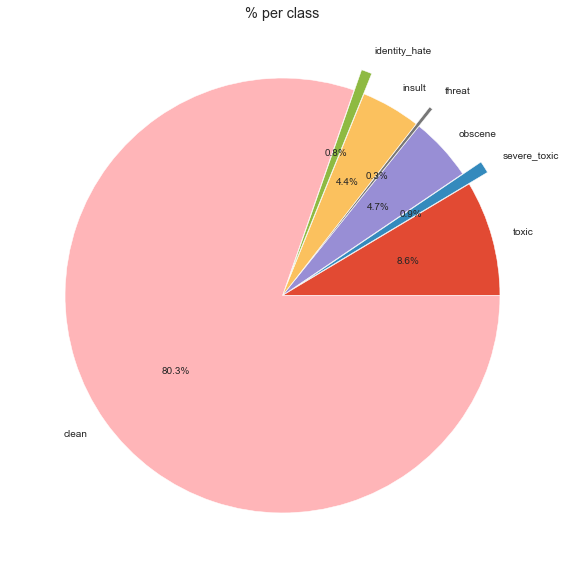

In [7]:
x.plot(kind = 'pie', explode = [0, 0.1, 0, 0.1, 0, 0.1, 0], figsize = (10, 10), autopct = '%1.1f%%', shadow = False)
plt.title("% per class")
plt.ylabel("")
plt.show()

The toxicity is not evenly spread out across classes. Hence we might face class imbalance problems

In [8]:
# Lets create a wordcloud to see some common words in each type of toxicity category.

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)


def createWordCloud(commentSeries):
    wc = WordCloud(width = 500, height = 350, max_words = 2000, stopwords = stopwords).generate(" ".join(commentSeries))
    plt.figure( figsize=(10,8), facecolor = 'k')
    plt.imshow(wc)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

##### Words frequented in Clean Comments

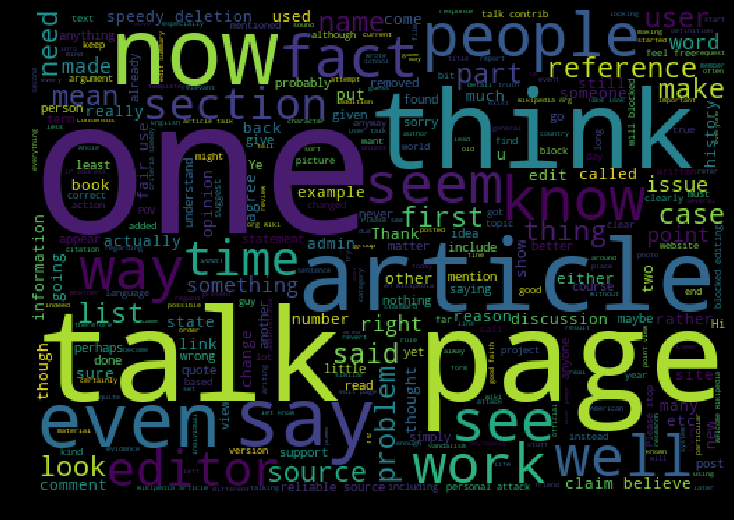

In [9]:
clean_comments = eda[eda["clean"] == 1]["comment_text"]
createWordCloud(clean_comments)

##### Words frequented in Toxic Comments

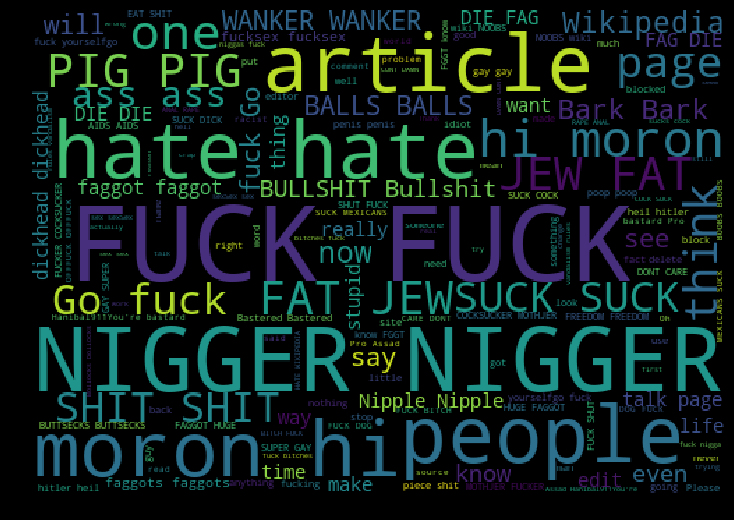

In [10]:
toxic_comments = eda[eda["toxic"] == 1]["comment_text"]
createWordCloud(toxic_comments)

##### Words frequented in Severe Toxic Comments

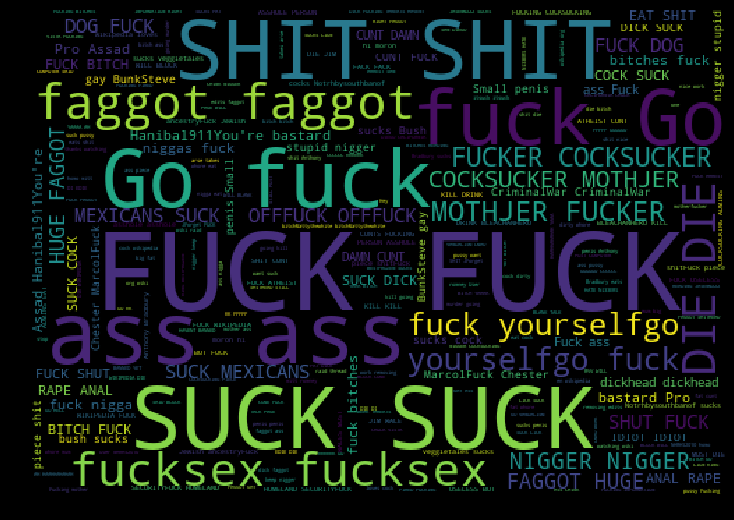

In [11]:
severe_toxic_comments = eda[eda["severe_toxic"] == 1]["comment_text"]
createWordCloud(severe_toxic_comments)

##### Words frequented in Obscence Comments

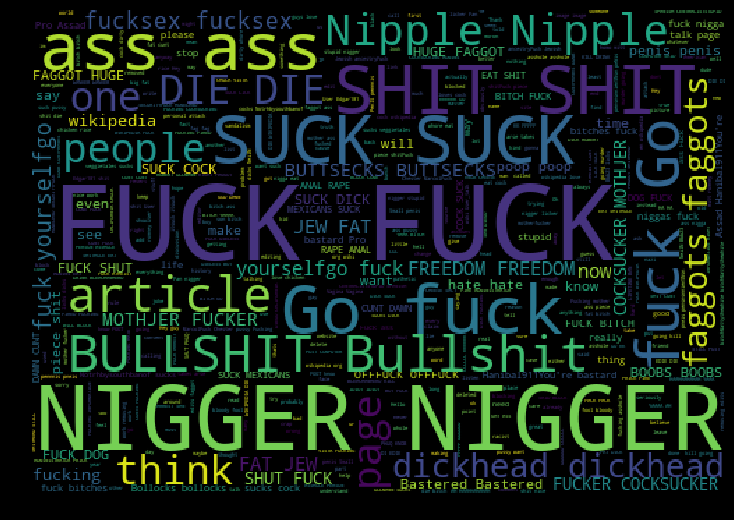

In [12]:
obscene_comments = eda[eda["obscene"] == 1]["comment_text"]
createWordCloud(obscene_comments)

##### Words frequented in Threat Comments

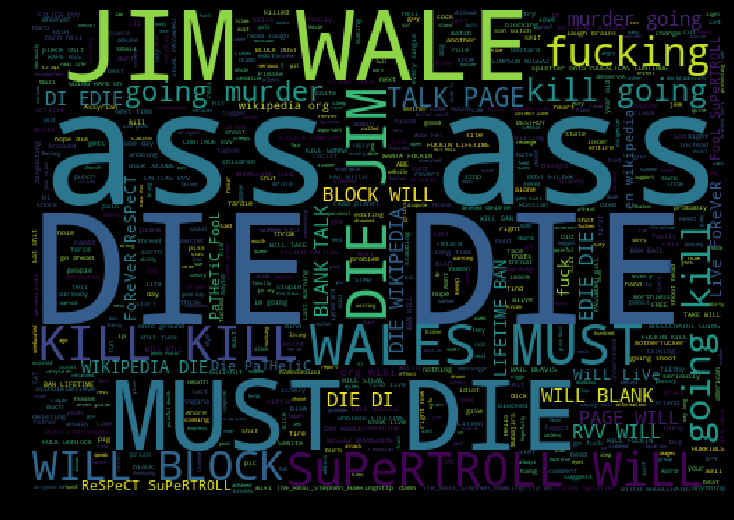

In [13]:
threat_comments = eda[eda["threat"] == 1]["comment_text"]
createWordCloud(threat_comments)

##### Words frequented in Insult Comments

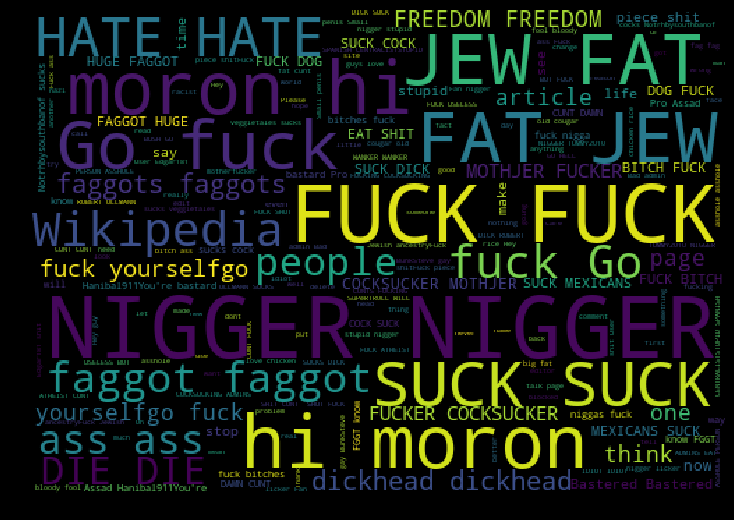

In [14]:
insult_comments = eda[eda["insult"] == 1]["comment_text"]
createWordCloud(insult_comments)

##### Words frequented in Identity Hate Comments

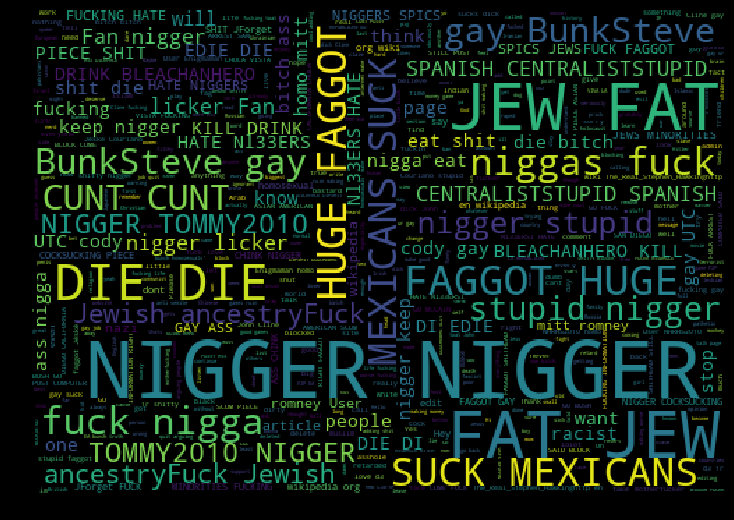

In [15]:
ihate_comments = eda[eda["identity_hate"] == 1]["comment_text"]
createWordCloud(ihate_comments)

##### More EDA

In [16]:
##### More EDA

##### Data Cleaning

For our machine learning models to work, we will need to convert our raw data (comment_text) into a format that is consumable by them. We do this by vectorization. Some of the common vectorized representation are `Bag of Words` and `Tfidf`. Both of these representations are very sparse matrix. In order to reduce the sparsity, we will need to trim down our vocabulary. We do this by removing words that are not relevant and converting different words that convey the same meaning into a single word.

> Lets clean out text by `removing stopwords` and `stemming` our comments.
  `Stopwords` : Common words such as 'the', 'we' etc that won't help us in our semantic analysis.
  `Stemming` : Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or     root form. Eg love, loved and loving mean the same thing and performing a stem operation on them will reduce all of   them into the same root form 'lov'. This will further reduce our vocab and reduce the matrix sparsity of our bag of   words/ ngrams representations


In [17]:
# Text Preprocessing
import nltk
# nltk.download("all")

# Stopwords
from nltk.corpus import stopwords

import string
from nltk.tokenize import word_tokenize

# Stemmer
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")

def cleanComment(comment):
    comment = comment.translate(str.maketrans('', '', string.punctuation))
    words = [stemmer.stem(word.lower()) for word in word_tokenize(comment) if word.lower() not in stopwords.words("english")]
    # TODO More cleaning stuff.
    return " ".join(words)

In [18]:
# Example of cleaning a text.
# Notice how all stopwords are removed and words with the same meaning (loves, love, lovely) 
# are reduced to the same base word love

originalText = "This is Mr Rob. Mr Rob loves ice creams. Rob is also in love with football. Football is a lovely game"
print(cleanComment(originalText))

mr rob mr rob love ice cream rob also love footbal footbal love game


In [19]:
# Lets Clean our train and test data.

train["comment_text"] = train["comment_text"].apply(cleanComment)
test["comment_text"] = test["comment_text"].apply(cleanComment)

display(HTML(train.sample(n = 5).to_html()))

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
133843,cc0bab5c296da436,seem problem confront somewhat radic view arou...,0,0,0,0,0,0
68901,b85566d97be4e9bc,say meant refer provid sourc use west bulgaria...,0,0,0,0,0,0
70794,bd746742af2bb36c,might well turn part featur command conquer rt...,0,0,0,0,0,0
148056,460e353cffdb781d,iq remov refer iq lead blog sourc noth specul ...,0,0,0,0,0,0
10400,1b7bbc3fc02bf048,hello person hope class welcom wide world wiki...,0,0,0,0,0,0


### <u>Vectorization</u>

Now that we are done cleaning our data, lets transform our cleaned data into a form that can be consumed by our machine learning algorithms. 

Below are some of the vectorized forms we can chose from :

* Bag of Words : In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its  words, where the (frequency of) occurrence of each word is used as a feature for training a classifier.
[Bag-of-words](https://en.wikipedia.org/wiki/Bag-of-words_model)

* Tfidf : TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.
[Tf-idf](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)

##### Bag of words (CountVectorizer)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

txt = ["He is having a great time, at the park time?",
       "She, unlike most women, is a big player on the park's grass.",
       "she can't be going"]

In [32]:
# Unigram bag of words

cvec_uni = CountVectorizer(analyzer = "word", min_df = 1, max_df = 1.0, ngram_range = (1, 1))
unigram_bag_of_words = cvec_uni.fit_transform(txt)

# Features in our unigram_bag_of_words
print(cvec_uni.get_feature_names())

['at', 'be', 'big', 'can', 'going', 'grass', 'great', 'having', 'he', 'is', 'most', 'on', 'park', 'player', 'she', 'the', 'time', 'unlike', 'women']
